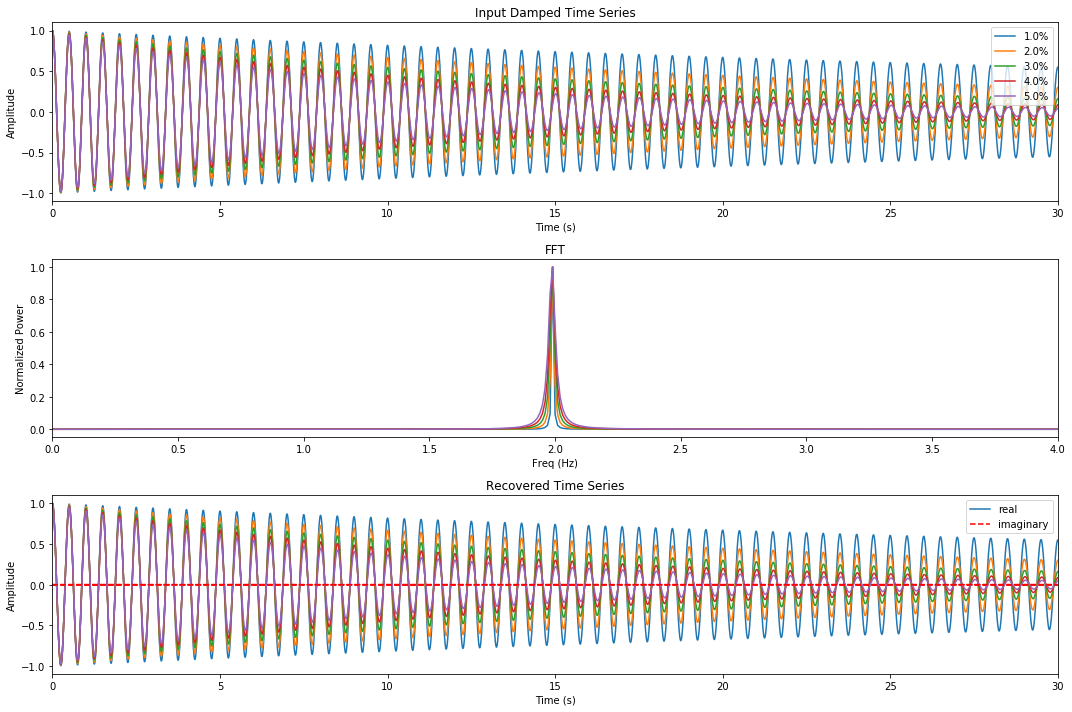

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 24 10:46:42 2018

@author: u1014602
"""

import matplotlib.pyplot as plt
import numpy as np
import math

"""These values can be changed"""
sig_len = 100 # in seconds (will affect resolution of FFT, shorter = lo-res)
fs = 1000 # sampling rate in Hz
f0 = 2 # fundamental frequency in Hz
damping_start = 1# percent of critical damping, range of [0,100]
damping_end = 6 # percent of critical damping, range of [0,100]
damping_interval = 1# percent of critical damping, range of [0,100]



plt.close('all')
fig1 = plt.figure(figsize=[15,10])
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
damping_values = np.arange(damping_start,damping_end,damping_interval)/100
for zeta in damping_values:
    
    """Figure 1 - Damped time series amplitude (% of critical damping)"""
    fn = f0
    fnd = fn*np.sqrt(1-zeta**2)
    t = np.arange(0,sig_len,1/fs)
    y = np.e**(-zeta*fnd*t)*(np.cos(2*np.pi*fnd*t))
    
    ax1.plot(t,y,label = str(round(zeta*100))+'%')
    ax1.legend(loc=1)
    ax1.set_title('Input Damped Time Series')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')

    ax1.set_xlim([0,int(math.ceil(1/f0*60 / 10.0))*10])

    """Figure 2 - FFT of Fig. 1 time series - plotted as normalized power"""
    Y = np.fft.fft(y)
    L = sig_len*fs
    P1 = abs(Y/L)[1:int(L/2+1)]
    P1[2:-2] = 2*P1[2:-2]
    f = fs*np.arange(0,(L/2))/L
    P1 = np.interp(P1, (P1.min(), P1.max()), (0, 1)) # normalizing
    
    ax2.plot(f,P1**2)
    if f0 < 4:
        ax2.set_xlim([0,2*f0])
    else:
        ax2.set_xlim([f0-4,f0+4])
    ax2.set_title('FFT')
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('Normalized Power')
    
    """Figure 3 - Recovered time series using IFFT"""
    s = np.fft.ifft(Y)
    t = np.arange(len(s))/fs
    
    ax3.plot(t,s.real,t,s.imag, 'r--')
    ax3.set_title('Recovered Time Series')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Amplitude')
    ax3.set_xlim([0,int(math.ceil(1/f0*60 / 10.0))*10])
    ax3.legend(('real', 'imaginary'))
    
plt.tight_layout()
plt.show()